# GALPY (PHYS265)
## Martin Cruzat - May 18th, 2025

Galpy is a python package that is mostly used for galactic dynamics. It is paried well with the astropy package however the main focus will be on Galpy.

## How to Begin
First we will import the necesary packages and the several curves to use as examples. We will also install numpy here only as a resource to create arrays and numbers, it is not necesary but it is sugested

In [2]:
import galpy
import numpy as np
import matplotlib.pyplot as plt

## Plotting!

Galpy can be used to Display rotation curves and preform orbit integration for various potentials. The main packages used here will be `galpy.potential` and `galpy.orbit`. We will be focusing on plotting only therefore the Astrophysics part will not be covered

The following code is the very basics of plotting. First we plot the Miyamoto-Nagai disk potential by using the `plotRotcurve` function. This function is used primarily for Curve Rotations and has many different options for customization

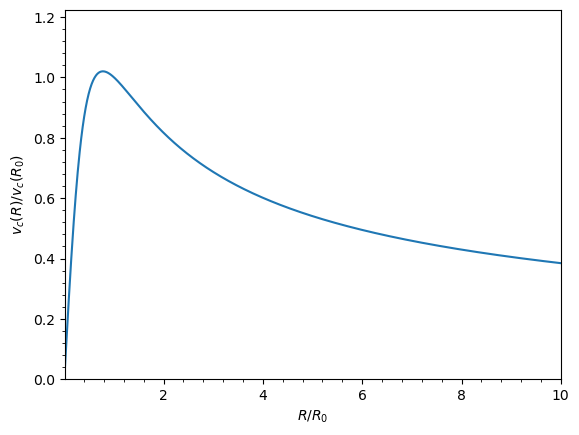

In [4]:
from galpy.potential import MiyamotoNagaiPotential as MNP
from galpy.potential import (plotRotcurve, MWPotential2014 as mwp14)
mp = MNP(a=0.5, b=0.05, normalize=1.);
mp.plotRotcurve(Rrange=[0.01, 10], grid=1001);

The plotRotcurve is the best way to immediateley display potential of any kind. While the normal `plot` function can work, it is more work and harder to set up for this specific situation making the `plotRotcurve` function superior. This function allows us to combine curves, not only in the graph, but also in terms of their individual values as shown below. Note we can call the `plotRotcurv` function by either typing it first in the line or using a potential first and calling it with that instead:

* `plotRotcurv()`
* `potential.plotRotcurv()`


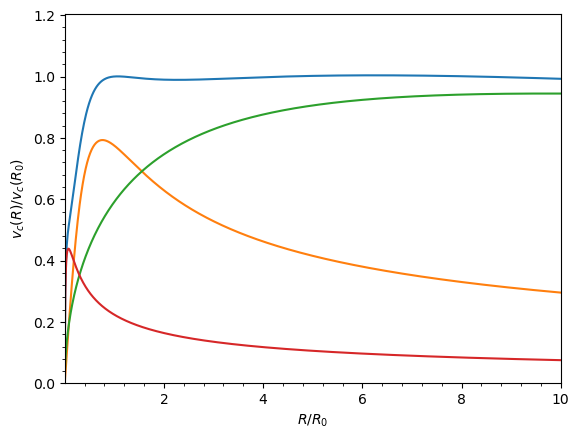

In [3]:
#Importing other potentials here for more examples
from galpy.potential import NFWPotential as NFWP, HernquistPotential as HQP
mp = MNP(a=0.5, b=0.0375, normalize=.6)
nfp = NFWP(a=4.5, normalize=.35)
hp = HQP(a=0.6/8, normalize=0.05)

#This plots the combined functions all into one which is represented as the blue line
plotRotcurve(hp+nfp+mp, Rrange=[0.001,10], grid=1001);

#This plots all other functions seperatley into the same graph thanks to the overplot=True function
mp.plotRotcurve(Rrange=[0.001, 10], grid=1001, overplot=True);
nfp.plotRotcurve(Rrange=[0.001, 10], grid=1001, overplot=True);
hp.plotRotcurve(Rrange=[0.001, 10], grid=1001, overplot=True);

The above shows how to plot a rotational curve for potential(s), this will show how to plot escape velocity curves. First we import the `plotEscapecurve` and test it. Note that this functions is similar to `plotRotcurve` and has some similar attributes. For example, we can call it in one of two ways:

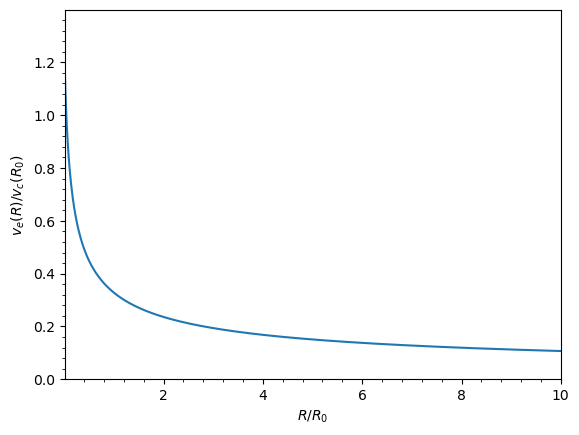

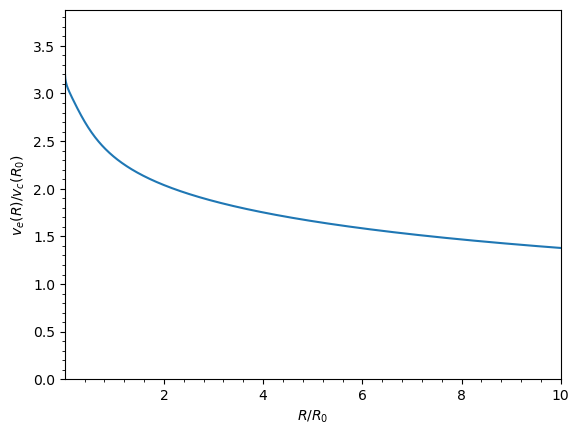

In [4]:
from galpy.potential import plotEscapecurve
hp.plotEscapecurve(Rrange=[0.01, 10.], grid=1000);
plotEscapecurve(mwp14, Rrange=[0.001, 10.], grid=1001);

While these plots may look as  if you can use the plot() function on them, you can't. These are plotting entirely different things, however there are more options for plotting potentials.

## Potential and Density Plotting 

While we are able to use the normal `plot()` function in order to plot potentials, we can use the `plotPotentials` function in order to do it more smoothly and with more options. Below we can compare the graphs of both functions and we can see that the `plotPotentials` is smoother

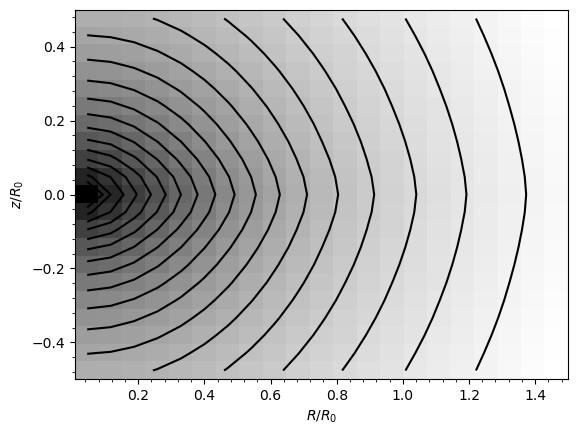

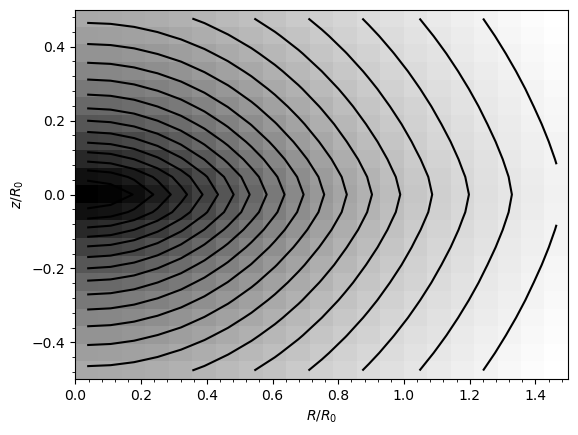

In [5]:
from galpy.potential import plotPotentials

# Top Plot
plotPotentials(mwp14, rmin=0.01);

# Bottom Plot
mp.plot();

We are also able to plot densities using the `plotDensities` function. This has more parameters that are needed but works wonders for graphing density. As you can see there is a wide selection of graphing tools to use depending on your needs for 2d plots

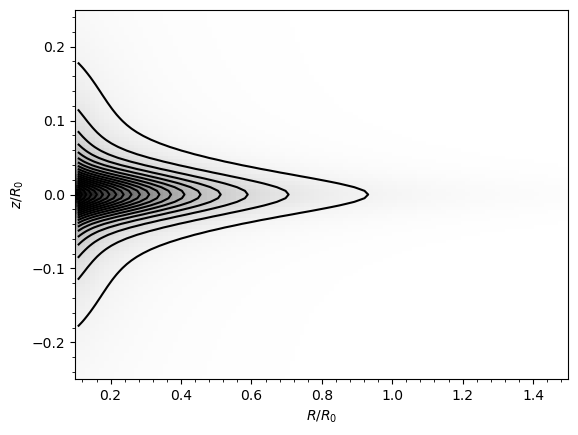

In [6]:
from galpy.potential import plotDensities
plotDensities(mwp14, rmin=0.1, zmax=0.25, zmin=-0.25, nrs=101, nzs=101);

## Orbital Plotting and Animations!

For this part we will be mainly using the `Orbit` function. This takes a data set set of numbers and turns them into an orbit. The function automatically figures out the dimensionality of space from the initial conditions in some cases. Plotting an orbit gives us something like this:

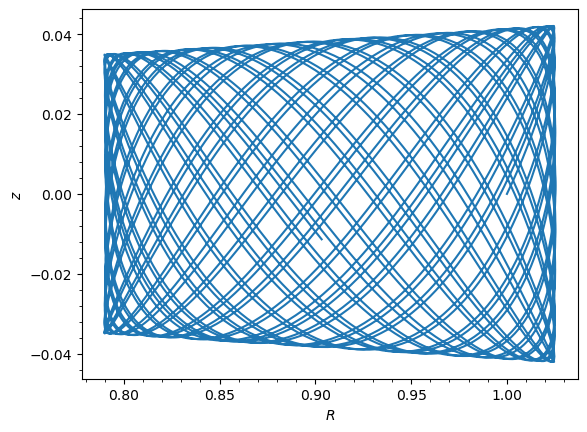

In [5]:
from galpy.orbit import Orbit
o = Orbit([1,0.1,0.9,0,0.1,0])
ts = np.linspace(0, 100, 10001)
o.integrate(ts,mwp14)
o.plot();

While we are able to plot the orbit, it is difficult to see where the orbit starts and ends in most cases. For this we can use th `animate` function which lets us see the orbits in each point in time. The `Orbit.animate` function lets you see speed up, slow down, or replay the specified orbit. 

### Warning: These animations cannot be viewed in a pdf style format therefore the only way to properly view them would be through either the notebook or reproducing the code.

In [8]:
from galpy.potential import LogarithmicHaloPotential
lp = LogarithmicHaloPotential(normalize=1)
op = Orbit([1,0.1,1.1,0,0.1,0], ro=8, vo=220)
op.integrate(ts,lp)
op.animate()

This function also allows you to choose which specific dimensions you wish to animate. For this example I chose the x and y axis for dimension 1 and the R and Z axis for 2. This lets you view the same orbit from different perspectives.

In [9]:
op.animate(d1=['x','R'],d2=['y', 'z'], width=800)

The following is the same orbit as beffore but shown in a 3d plot over a background of the mily way galaxy! There are many options you can choose from and the animation is very clear as well. I found it to be a great new tool to use.

In [10]:
op.animate3d(mw_plane_bg=True)

## Reproducability Issues

While all of this is theoretically possible on any given coding device, the graphs may differ depending on any number of given factors. Of these include processing strngth of the device, whether the imported values have been updated, or even device brand such as Mac or Windows. All of this should be kept in mind when attempting to reproduce this notebook.

## Extra Figures

The following are very complex figures to make which involve physics I do not yet understand. However the main focus is the graphs. This specific graph focuses on the `dens2` function. This plots a 2d density with optional contours. This graph shows the Hercules Stream in the Solar neighborhood as a result of the Galactic bar

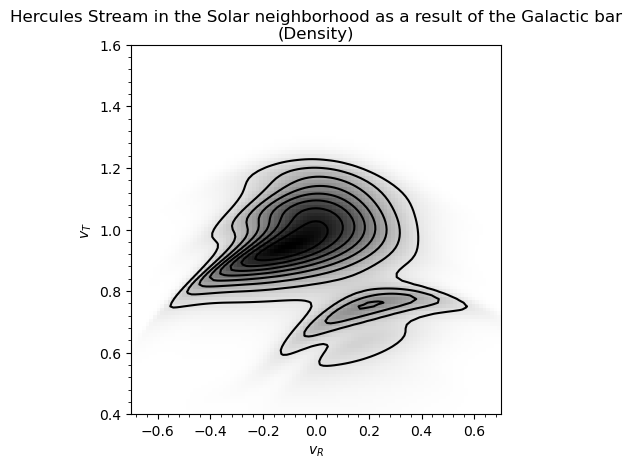

In [13]:
from galpy.df import dehnendf
from galpy.potential import LogarithmicHaloPotential, DehnenBarPotential
lp= LogarithmicHaloPotential(normalize=1.)
dp= DehnenBarPotential()

ts= np.linspace(0,dp.tform(),1000)

ins= Orbit(np.array([[[1.,-0.7+1.4/100*jj,1.-0.6+1.2/100*ii,0.] for jj in range(101)] for ii in range(101)]))
ins.integrate(ts,[lp,dp])

dfc= dehnendf(beta=0.,correct=True)
out= [[dfc(o(dp.tform())) for o in j] for j in ins]
out= np.array(out)

from galpy.util.plot import dens2d
dens2d(out,origin='lower',cmap='gist_yarg',contours=True,
xrange=[-0.7,0.7],yrange=[0.4,1.6],xlabel=r'$v_R$',ylabel=r'$v_T$');
plt.title("Hercules Stream in the Solar neighborhood as a result of the Galactic bar (Density)", wrap=True);
plt.savefig("Figure 1")

This graph shows how one can use Action-angle coordinates using an orbit-integration-based approximation in a plot. Once more the physics is too complex however we can see how the `Orbit` and `integrate` functions are used to modify an existing action angle coordinate system. This results in the following graph. 

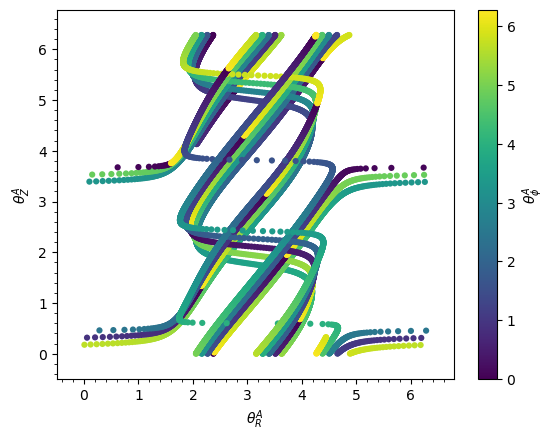

In [10]:
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.actionAngle import estimateBIsochrone

lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
aAIA= actionAngleIsochroneApprox(pot=lp,b=0.8)

obs= np.array([1.56148083,0.35081535,-1.15481504,0.88719443,-0.47713334,0.12019596]) 
aAIA(*obs)

aAIA= actionAngleIsochroneApprox(pot=lp,b=10.8)
aAIA(*obs)


o= Orbit(obs)
ts= np.linspace(0.,100.,1001)
o.integrate(ts,lp)
estimateBIsochrone(lp,o.R(ts),o.z(ts))

aAIA= actionAngleIsochroneApprox(pot=lp,b=1.5)
aAIA(*obs)

aAIA.plot(*obs,type='araz');